In [1]:
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Pairplots

In [2]:
large_data = pd.read_csv('data/data.csv')
music_features = large_data[['acousticness','danceability','energy','instrumentalness','liveness','speechiness']]
#print('No real trends/correlations can be observed from this data')
#sb.pairplot(music_features)

In [3]:
large_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


# Heatmaps without Popularity

In [4]:
#Let's try splitting our data by decade
music_years = large_data[['acousticness','danceability','energy','instrumentalness','liveness','speechiness','year']]
summary = music_years.describe()
summary

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,year
count,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,0.488593,0.161937,0.206690,0.094058,1977.223231
std,0.376627,0.175346,0.267390,0.309329,0.176796,0.149937,25.593168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,0.263000,0.000000,0.098400,0.034900,1957.000000
50%,0.492000,0.548000,0.481000,0.000204,0.135000,0.045000,1978.000000
75%,0.888000,0.667000,0.710000,0.086800,0.263000,0.075400,1999.000000
max,0.996000,0.988000,1.000000,1.000000,1.000000,0.969000,2020.000000


In [5]:
print(summary.at['min','year'])
print(round(int(summary.at['min', 'year']), -1))
print(round(int(summary.at['max','year']), -1))

1921.0
1920
2020


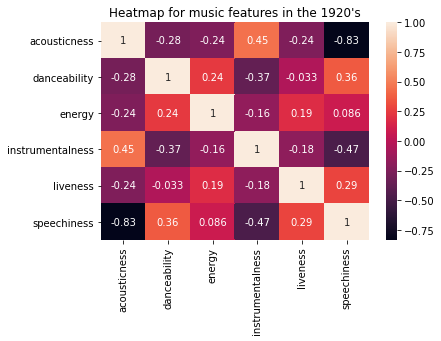

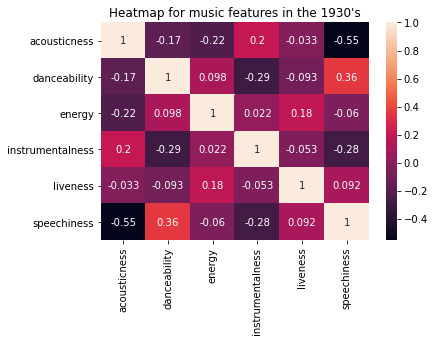

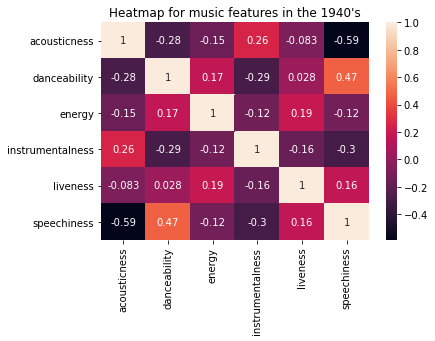

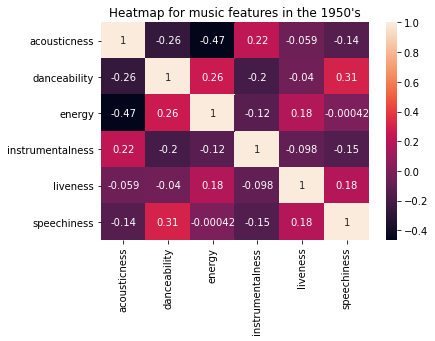

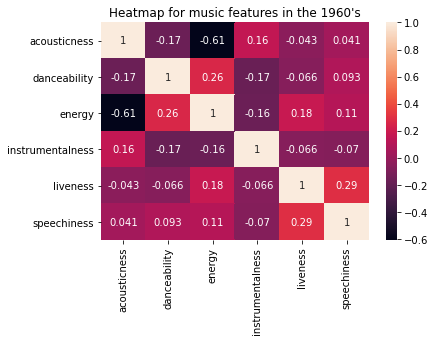

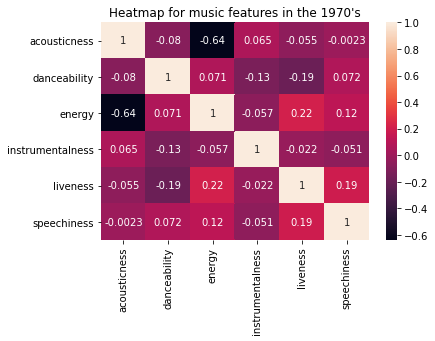

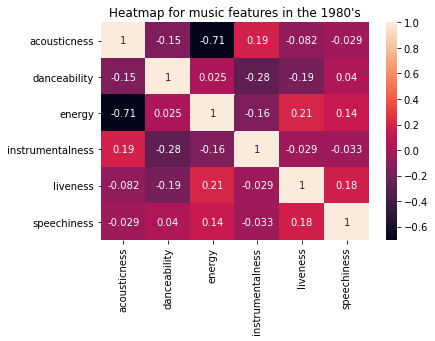

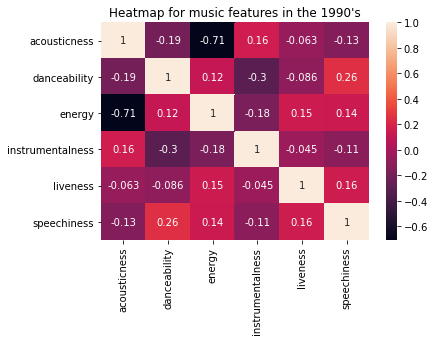

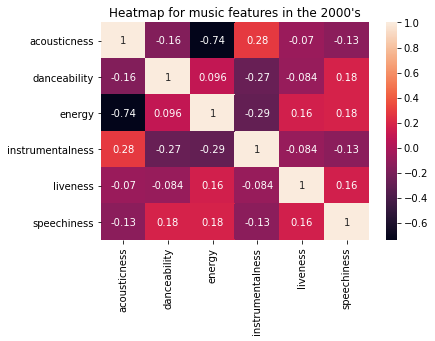

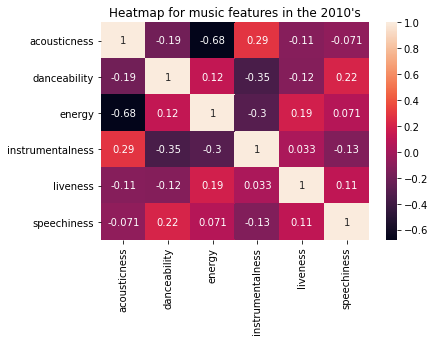

In [6]:
start_dec = round(int(summary.at['min', 'year']), -1)
last_dec = round(int(summary.at['max','year']), -1)

def heatmap_by_decade(df, start_dec, last_dec, fig_size = None):
    for dec in range(start_dec, last_dec, 10):
        decade_df = df[df['year'] >= dec]
        decade_df = decade_df[decade_df['year'] < (dec + 10)]
        decade_df = decade_df.drop(labels = 'year', axis = 1)
        #g = sb.pairplot(decade_df)
        #g.fig.suptitle('Pairplot for music features in the ' + str(dec) + '\'s', y = 1.01)
        #plt.show()
        corr_mat = decade_df.corr()
        
        if fig_size:
            plt.figure(figsize = fig_size)
        else:
            plt.figure()
        ax = plt.axes()
        sb.heatmap(corr_mat, ax = ax, annot = True)
        ax.set_title('Heatmap for music features in the ' + str(dec) + '\'s')
        plt.savefig('data/' + str(dec) + '.png')
        plt.show()

heatmap_by_decade(music_years, start_dec, last_dec)

# PCA

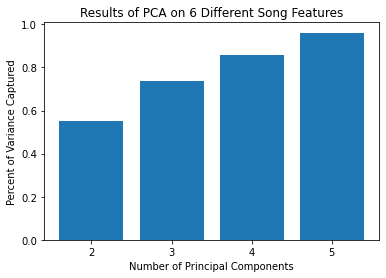

In [7]:
#Let's do PCA on the data as well
from sklearn.decomposition import PCA
X_music = music_years.drop(labels = 'year', axis = 1).to_numpy()
for col in range(X_music.shape[1]):
    mean = X_music[:,col].mean()
    std = X_music[:,col].std()
    X_music[:,col] = (X_music[:,col] - mean) / std

#Let's try running PCA with 2, 3, 4, and 5 components
ks = []
sums = []
for k in range(2,6):
    pca = PCA(n_components = k)
    pca.fit(X_music)
    ks.append(k)
    sums.append(sum(pca.explained_variance_ratio_))
plt.bar(ks, sums)
plt.xlabel('Number of Principal Components')
plt.ylabel('Percent of Variance Captured')
plt.title('Results of PCA on 6 Different Song Features')
plt.xticks(ks, [2, 3, 4, 5])
plt.show()

# Heatmaps with Popularity

In [8]:
large_data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


In [9]:
music_year_popularity = large_data[['acousticness','danceability','energy','instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness', 'tempo', 'valence', 'year']]
music_year_popularity.describe()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,valence,year
count,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000,169909.000000
mean,0.493214,0.538150,0.488593,0.161937,0.206690,-11.370289,31.556610,0.094058,116.948017,0.532095,1977.223231
std,0.376627,0.175346,0.267390,0.309329,0.176796,5.666765,21.582614,0.149937,30.726937,0.262408,25.593168
min,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,1921.000000
25%,0.094500,0.417000,0.263000,0.000000,0.098400,-14.470000,12.000000,0.034900,93.516000,0.322000,1957.000000
50%,0.492000,0.548000,0.481000,0.000204,0.135000,-10.474000,33.000000,0.045000,114.778000,0.544000,1978.000000
75%,0.888000,0.667000,0.710000,0.086800,0.263000,-7.118000,48.000000,0.075400,135.712000,0.749000,1999.000000
max,0.996000,0.988000,1.000000,1.000000,1.000000,3.855000,100.000000,0.969000,244.091000,1.000000,2020.000000


<ipython-input-10-b4aed5ef0874>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_year_popularity['popularity'] = (music_year_popularity['popularity'] - popmin) / (popmax - popmin)
<ipython-input-10-b4aed5ef0874>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_year_popularity['loudness'] = (music_year_popularity['loudness'] - loudmin) / (loudmax - loudmin)
<ipython-input-10-b4aed5ef0874>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

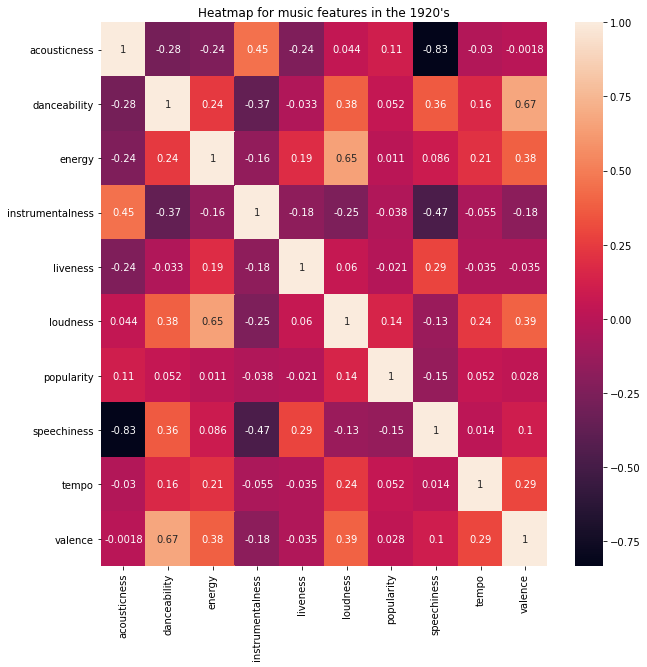

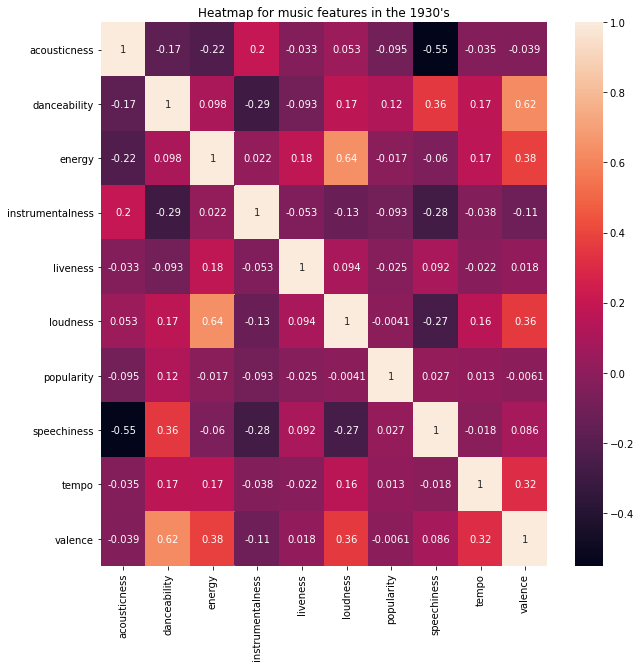

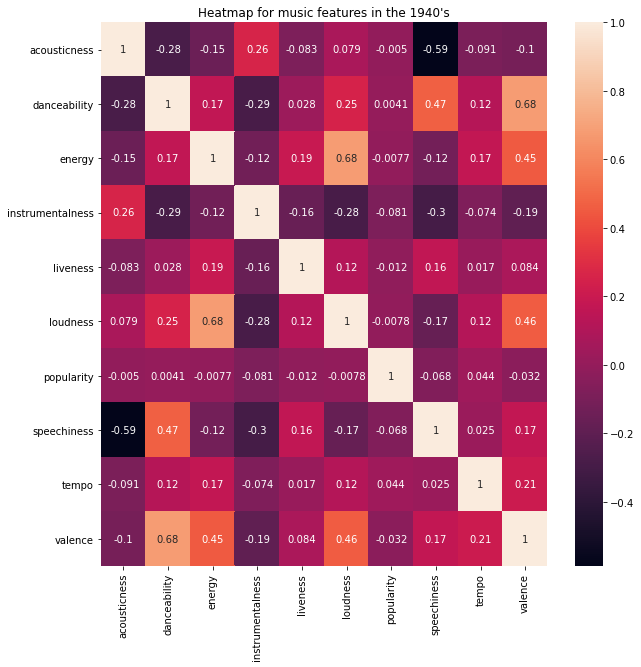

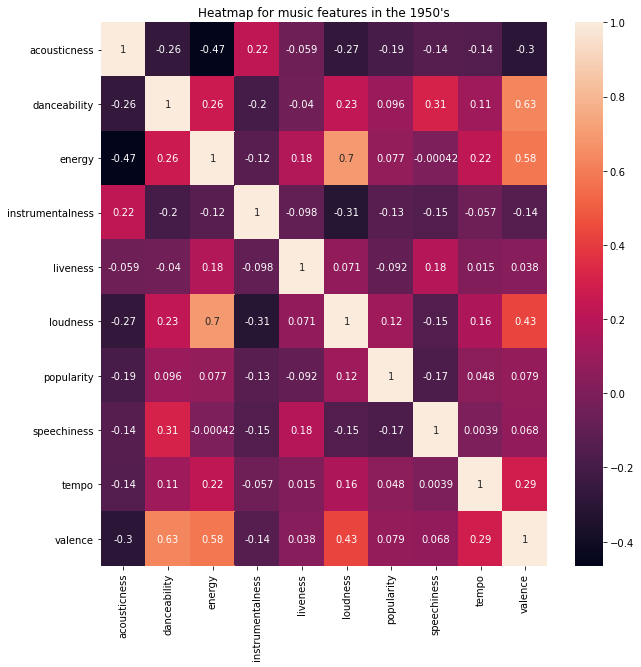

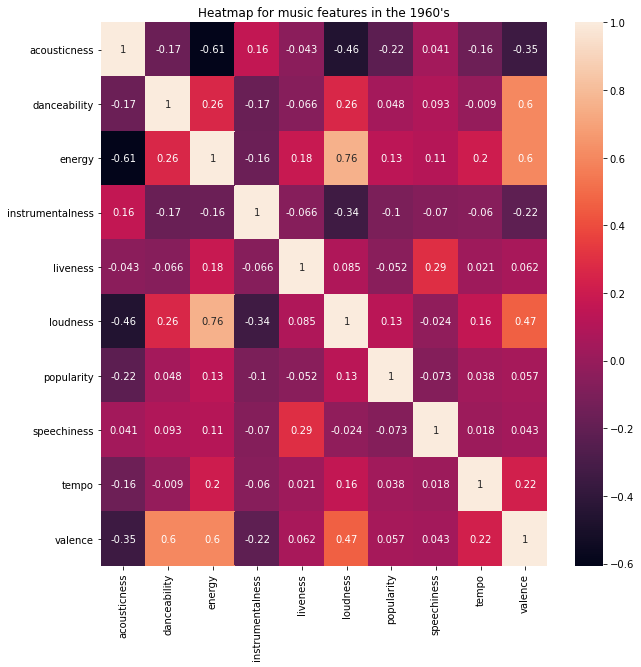

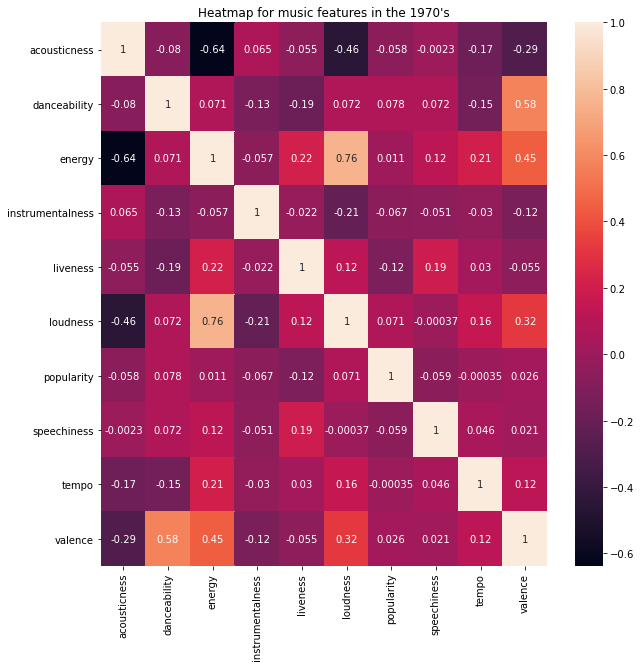

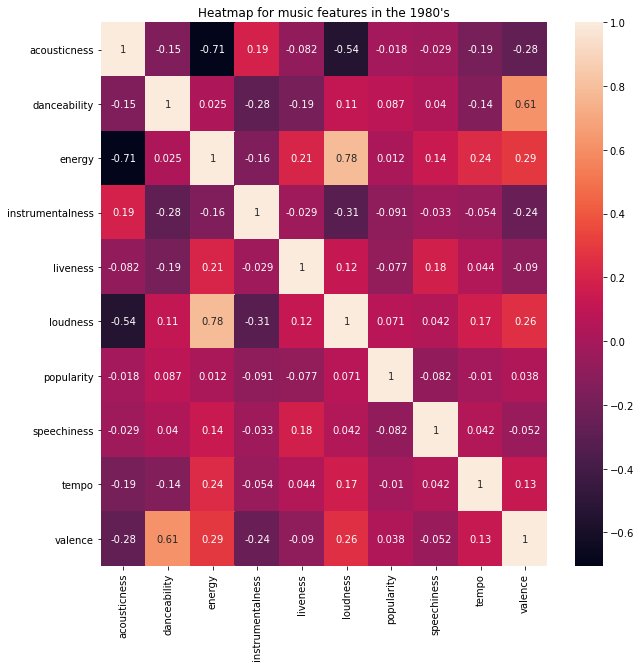

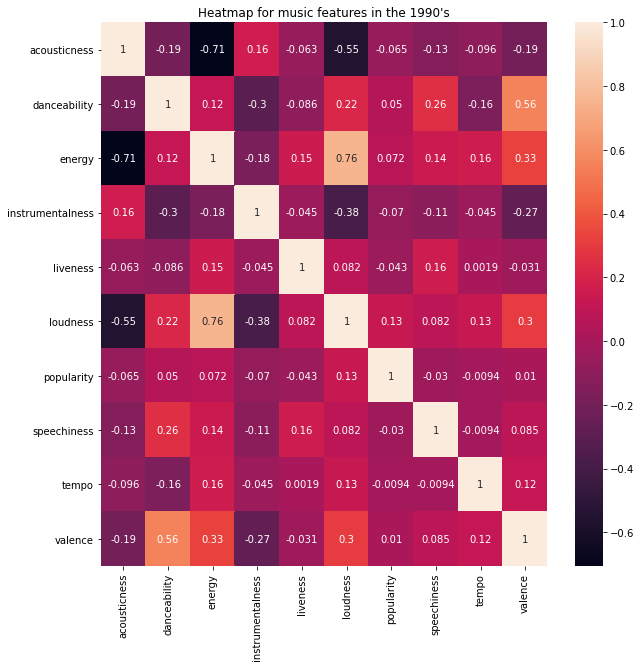

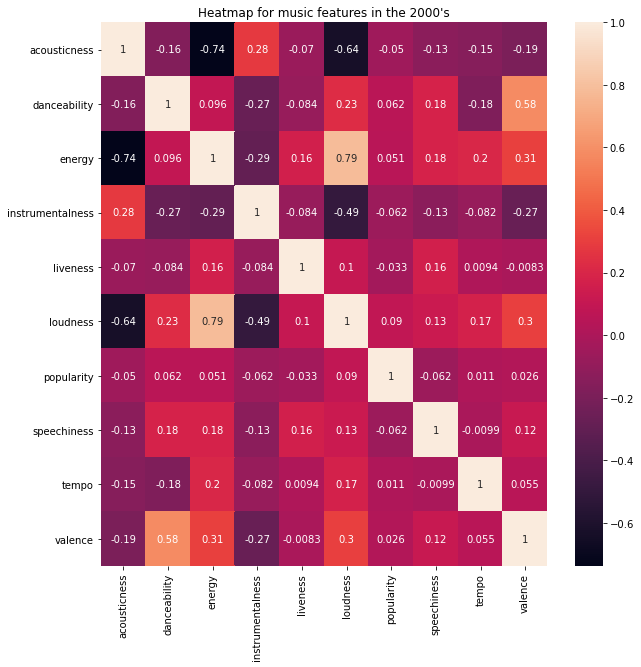

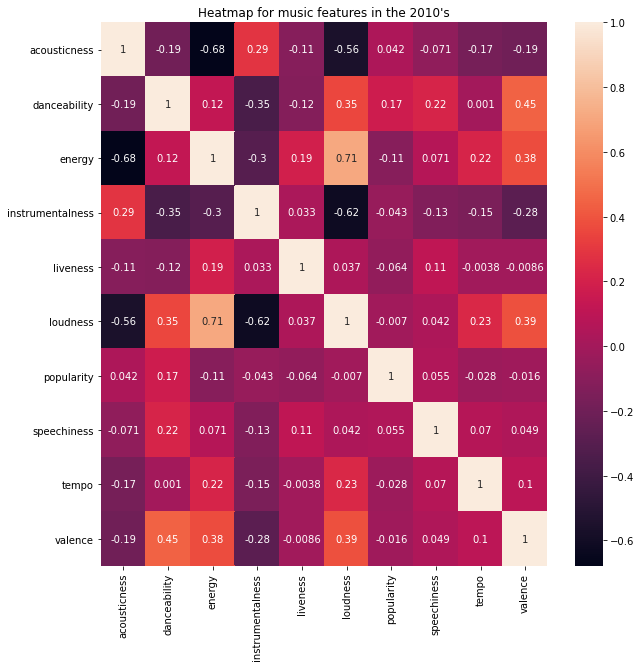

In [10]:
#Normalize features that are not from 0-1 by min-max normalization
popmin = music_year_popularity['popularity'].min()
popmax = music_year_popularity['popularity'].max()
music_year_popularity['popularity'] = (music_year_popularity['popularity'] - popmin) / (popmax - popmin)
loudmin = music_year_popularity['loudness'].min()
loudmax = music_year_popularity['loudness'].max()
music_year_popularity['loudness'] = (music_year_popularity['loudness'] - loudmin) / (loudmax - loudmin)
tempmin = music_year_popularity['tempo'].min()
tempmax = music_year_popularity['tempo'].max()
music_year_popularity['tempo'] = (music_year_popularity['tempo'] - tempmin) / (tempmax - tempmin)

#Split the data by year again
heatmap_by_decade(music_year_popularity, start_dec, last_dec, fig_size = (10,10))